THỐNG KÊ VQA DATASET

1. TỔNG QUAN:
   - Tổng số QA pairs: 7658
   - Số ảnh unique: 1679

2. PHÂN BỐ LOẠI CÂU HỎI:
   - What/Gì: 5126 (66.9%)
   - Where/Đâu: 36 (0.5%)
   - When/Khi nào: 0 (0.0%)
   - Who/Ai: 40 (0.5%)
   - Why/Tại sao: 1408 (18.4%)
   - How/Như thế nào: 67 (0.9%)
   - Other: 981 (12.8%)

3. ĐỘ DÀI CÂU HỎI (ký tự):
   - Min: 10
   - Max: 161
   - Mean: 52.8

4. ĐỘ DÀI CÂU TRẢ LỜI (ký tự):
   - Min: 120
   - Max: 786
   - Mean: 343.8

5. ĐỘ PHỦ THÔNG TIN BỔ SUNG:
   - Có cultural_significance: 7658/7658 (100.0%)
   - Có historical_context: 7658/7658 (100.0%)


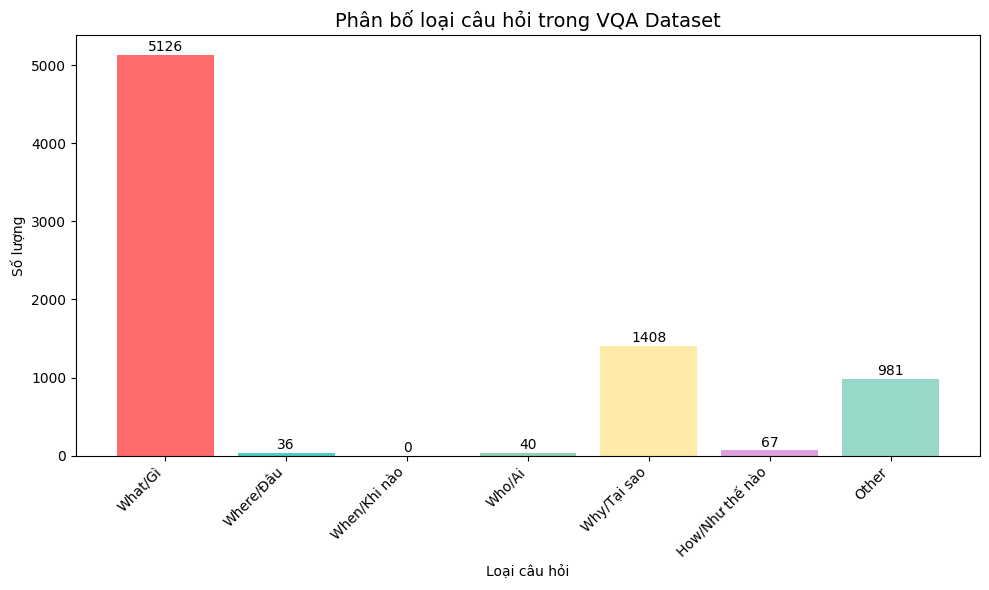


=> Đã lưu biểu đồ: question_type_distribution.png


In [1]:
import json
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load data
with open('/content/vqa_preprocessed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)


print("THỐNG KÊ VQA DATASET")


# 1. Tổng số mẫu
print(f"\n1. TỔNG QUAN:")
print(f"   - Tổng số QA pairs: {len(data)}")

# 2. Số ảnh unique
unique_images = set(item['image_path'] for item in data)
print(f"   - Số ảnh unique: {len(unique_images)}")

# 3. Phân loại câu hỏi theo từ khóa đầu
question_types = {
    'What/Gì': 0,
    'Where/Đâu': 0,
    'When/Khi nào': 0,
    'Who/Ai': 0,
    'Why/Tại sao': 0,
    'How/Như thế nào': 0,
    'Other': 0
}

for item in data:
    q = item['question'].lower()
    if any(kw in q for kw in ['gì', 'what', 'là gì', 'nào']):
        question_types['What/Gì'] += 1
    elif any(kw in q for kw in ['đâu', 'where', 'ở đâu', 'nơi']):
        question_types['Where/Đâu'] += 1
    elif any(kw in q for kw in ['khi nào', 'when', 'năm nào', 'thời gian', 'bao giờ']):
        question_types['When/Khi nào'] += 1
    elif any(kw in q for kw in ['ai', 'who', 'người nào']):
        question_types['Who/Ai'] += 1
    elif any(kw in q for kw in ['tại sao', 'why', 'vì sao']):
        question_types['Why/Tại sao'] += 1
    elif any(kw in q for kw in ['như thế nào', 'how', 'cách', 'bằng cách']):
        question_types['How/Như thế nào'] += 1
    else:
        question_types['Other'] += 1

print(f"\n2. PHÂN BỐ LOẠI CÂU HỎI:")
for qtype, count in question_types.items():
    pct = count / len(data) * 100
    print(f"   - {qtype}: {count} ({pct:.1f}%)")

# 4. Thống kê độ dài câu hỏi
question_lengths = [len(item['question']) for item in data]
print(f"\n3. ĐỘ DÀI CÂU HỎI (ký tự):")
print(f"   - Min: {min(question_lengths)}")
print(f"   - Max: {max(question_lengths)}")
print(f"   - Mean: {sum(question_lengths)/len(question_lengths):.1f}")

# 5. Thống kê độ dài câu trả lời
answer_lengths = [len(item['answer']) if isinstance(item['answer'], str) else len(str(item['answer'])) for item in data]
print(f"\n4. ĐỘ DÀI CÂU TRẢ LỜI (ký tự):")
print(f"   - Min: {min(answer_lengths)}")
print(f"   - Max: {max(answer_lengths)}")
print(f"   - Mean: {sum(answer_lengths)/len(answer_lengths):.1f}")

# 6. Kiểm tra có cultural_significance và historical_context không
has_cultural = sum(1 for item in data if item.get('cultural_significance'))
has_historical = sum(1 for item in data if item.get('historical_context'))
print(f"\n5. ĐỘ PHỦ THÔNG TIN BỔ SUNG:")
print(f"   - Có cultural_significance: {has_cultural}/{len(data)} ({has_cultural/len(data)*100:.1f}%)")
print(f"   - Có historical_context: {has_historical}/{len(data)} ({has_historical/len(data)*100:.1f}%)")

# 7. Vẽ biểu đồ phân bố loại câu hỏi
plt.figure(figsize=(10, 6))
types = list(question_types.keys())
counts = list(question_types.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
plt.bar(types, counts, color=colors)
plt.title('Phân bố loại câu hỏi trong VQA Dataset', fontsize=14)
plt.xlabel('Loại câu hỏi')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')
for i, (t, c) in enumerate(zip(types, counts)):
    plt.text(i, c + 50, str(c), ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('question_type_distribution.png', dpi=150)
plt.show()

print("\n=> Đã lưu biểu đồ: question_type_distribution.png")